In [1]:
# import fundamental libraries
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import os
import sys
sys.path.append('/mnt/c/Users/44yos/RacePrediction/resnet_win5')
from os import path
# import time

# preporcessing libraries
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
# from pickle import dump

# tesndorflow libraries
# import tensorflow as tf
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras import optimizers #, callbacks
# from tensorflow.python.keras import backend as K

# from models import resnet
from models import transformer

# from utils import functions
from training.utils import create_time_series_data, smooth_label, categorical_focal_loss, order_algorithm

In [2]:
max_col = 84

In [3]:
X = np.load('../training/X.npy')
X = X.astype('float32')
y_order = np.load('../training/y_order.npy')

In [4]:
alpha = len(y_order) / pd.DataFrame(y_order.flatten()).value_counts()
alpha = alpha.sort_index()
alpha = np.array(alpha)
alpha = np.append(0,alpha)
print(alpha.shape)
print(alpha)

(26,)
[0.00000000e+00 1.21687621e+00 1.21555368e+00 1.23063757e+00
 1.24041898e+00 1.25990362e+00 1.26100846e+00 1.28155834e+00
 1.32325490e+00 1.37157651e+00 1.45736210e+00 1.56413643e+00
 1.73521807e+00 1.98052140e+00 2.27608819e+00 2.71833648e+00
 3.58156912e+00 1.49347181e+01 2.00918164e+01 1.25825000e+03
 1.43800000e+03 2.51650000e+03 3.35533333e+03 4.02640000e+03
 5.03300000e+03 7.53440294e-02]


In [5]:
y = np_utils.to_categorical(y_order, dtype='float32')

In [6]:
y = smooth_label(y) 

In [7]:
# data split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.01, random_state = 0)
del X, y

In [8]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(19930, 24, 84)
(202, 24, 84)
(19930, 24, 26)
(202, 24, 26)


In [9]:
num_layers = 2 # hyperparameter
d_model = max_col # 4*35 84=4*3*7
num_heads = 28 # hyperparameter *must be a factor of d_model*
d_ffn = 16 # hyperparameter
pe_input = 24
target_size = 26
dropout_rate = 0.1 # hyperparameter

model1 = transformer.TransRace(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ffn=d_ffn,
    pe_input=pe_input,
    target_size=target_size,
    rate=dropout_rate,
                              )
opt = optimizers.Adam(decay=0.01)
loss = categorical_focal_loss(alpha=[alpha], gamma=0.5)
model1.compile(
    optimizer=opt,
    loss=loss,#'categorical_crossentropy', # 'sigmoid_focal_crossentropy'
    metrics=['accuracy'], #['categorical_accuracy']
)
model1.build(input_shape=(None, X_valid.shape[1], X_valid.shape[2]))
model1.load_weights("../models/results/transformer1.h5")
pred1 = model1.predict(X_valid)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.la

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_ou

    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
        return tf.transpose(x, perm=[0, 2, 1, 3])

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, 

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
        return tf.transpose(x, perm=[0, 2, 1, 3])

This may be caused by multiline strings or comments not indented at the same level as the code.


In [10]:
num_layers = 2 # hyperparameter
d_model = max_col # 4*35
num_heads = 21 # hyperparameter *must be a factor of d_model*
d_ffn = 16 # hyperparameter
pe_input = 24
target_size = 26
dropout_rate = 0.1 # hyperparameter

model2 = transformer.TransRace(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ffn=d_ffn,
    pe_input=pe_input,
    target_size=target_size,
    rate=dropout_rate,
                              )
opt = optimizers.Adam(decay=0.01)
loss = categorical_focal_loss(alpha=[alpha], gamma=0.5)
model2.compile(
    optimizer=opt,
    loss=loss,#'categorical_crossentropy', # 'sigmoid_focal_crossentropy'
    metrics=['accuracy'], #['categorical_accuracy']
)
model2.build(input_shape=(None, X_valid.shape[1], X_valid.shape[2]))
model2.load_weights("../models/results/transformer2.h5")
pred2 = model2.predict(X_valid)

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_ou

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
     

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
     

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
     

In [11]:
num_layers = 1 # hyperparameter
d_model = max_col # 4*35
num_heads = 21 # hyperparameter *must be a factor of d_model*
d_ffn = 64 # hyperparameter
pe_input = 24
target_size = 26
dropout_rate = 0.1 # hyperparameter

model3 = transformer.TransRace(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ffn=d_ffn,
    pe_input=pe_input,
    target_size=target_size,
    rate=dropout_rate,
                              )
opt = optimizers.Adam(decay=0.01)
loss = categorical_focal_loss(alpha=[alpha], gamma=0.5)
model3.compile(
    optimizer=opt,
    loss=loss,#'categorical_crossentropy', # 'sigmoid_focal_crossentropy'
    metrics=['accuracy'], #['categorical_accuracy']
)
model3.build(input_shape=(None, X_valid.shape[1], X_valid.shape[2]))
model3.load_weights("../models/results/transformer3.h5")
pred3 = model3.predict(X_valid)

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_ou

    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
        return tf.transpose(x, perm=[0, 2, 1, 3])

This may be caused by multiline strings or comments not indented at the same level as the code.


In [12]:
num_layers = 1 # hyperparameter
d_model = max_col # 4*35
num_heads = 21 # hyperparameter *must be a factor of d_model*
d_ffn = 64 # hyperparameter
pe_input = 24
target_size = 26
dropout_rate = 0.1 # hyperparameter

model4 = transformer.TransRace(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ffn=d_ffn,
    pe_input=pe_input,
    target_size=target_size,
    rate=dropout_rate,
                              )
opt = optimizers.Adam(decay=0.01)
loss = categorical_focal_loss(alpha=[alpha], gamma=0.5)
model4.compile(
    optimizer=opt,
    loss=loss,#'categorical_crossentropy', # 'sigmoid_focal_crossentropy'
    metrics=['accuracy'], #['categorical_accuracy']
)
model4.build(input_shape=(None, X_valid.shape[1], X_valid.shape[2]))
model4.load_weights("../models/results/transformer4.h5")
pred4 = model4.predict(X_valid)

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_ou

    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
        return tf.transpose(x, perm=[0, 2, 1, 3])

This may be caused by multiline strings or comments not indented at the same level as the code.


In [13]:
num_layers = 1 # hyperparameter
d_model = max_col # 4*35
num_heads = 21 # hyperparameter *must be a factor of d_model*
d_ffn = 128 # hyperparameter
pe_input = 24
target_size = 26
dropout_rate = 0.1 # hyperparameter

model5 = transformer.TransRace(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    d_ffn=d_ffn,
    pe_input=pe_input,
    target_size=target_size,
    rate=dropout_rate,
                              )
opt = optimizers.Adam(decay=0.01)
loss = categorical_focal_loss(alpha=[alpha], gamma=0.5)
model5.compile(
    optimizer=opt,
    loss=loss,#'categorical_crossentropy', # 'sigmoid_focal_crossentropy'
    metrics=['accuracy'], #['categorical_accuracy']
)
model5.build(input_shape=(None, X_valid.shape[1], X_valid.shape[2]))
model5.load_weights("../models/results/transformer5.h5")
pred5 = model5.predict(X_valid)

    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print(x.shape,"mha")
        attn_output = self.mha(x, x, x, mask=mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_ou

    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, inputs, training=True):
        inp = inputs

        enc_padding_mask = self.create_masks(inp) #, tar
        # , look_ahead_mask, dec_padding_mask

        enc_output = self.encoder(inp, training, enc_padding_mask)

        final_output = self.final_layer(enc_output)
#         print("final output shape", final_output.shape)

        return final_output

This may be caused by multiline strings or comments not indented at the same level as the code.
    def call(self, x, training, mask):
#         print

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, self.seq_len, self.num_heads, self.depth))
#         print(x.shape,"split_head")
        return tf.transpose(x, perm=[0, 2, 1, 3])

This may be caused by multiline strings or comments not indented at the same level as the code.


In [14]:
sum_pred = (pred1 + pred2 + pred3 + pred4 + pred5) * 100 / 5 #log_pred1 + log_pred2 + log_pred3 + log_pred4 + log_pred5 # + log_pred6 + log_pred7 + log_pred8 + log_pred9 + log_pred10
# pred_order = (order_algorithm(sum_pred)).flatten()
# sum_pred = sum_pred.reshape([-1, 26])
# print(sum_pred.shape)
# # pred_order = np.argmax(sum_pred, axis = -1)
# print(pred_order.shape)

In [15]:
print(sum_pred.shape)
print(y_valid.shape)

(202, 24, 26)
(202, 24, 26)


In [16]:
pred = (order_algorithm(sum_pred)).flatten()
y_ans = np.argmax(y_valid, axis = 2).flatten()
print(pred.shape)
print(y_ans.shape)

(4848,)
(4848,)


              precision    recall  f1-score   support

           1      0.188     0.220     0.203       173
           2      0.109     0.141     0.123       156
           3      0.119     0.141     0.129       170
           4      0.100     0.121     0.110       165
           5      0.111     0.135     0.122       163
           6      0.091     0.114     0.101       158
           7      0.074     0.089     0.081       158
           8      0.087     0.099     0.093       161
           9      0.108     0.121     0.114       149
          10      0.106     0.115     0.110       139
          11      0.060     0.052     0.056       135
          12      0.080     0.056     0.066       125
          13      0.125     0.068     0.088       117
          14      0.026     0.011     0.015        95
          15      0.143     0.055     0.079        73
          16      0.000     0.000     0.000        57
          17      0.000     0.000     0.000        13
          18      0.000    

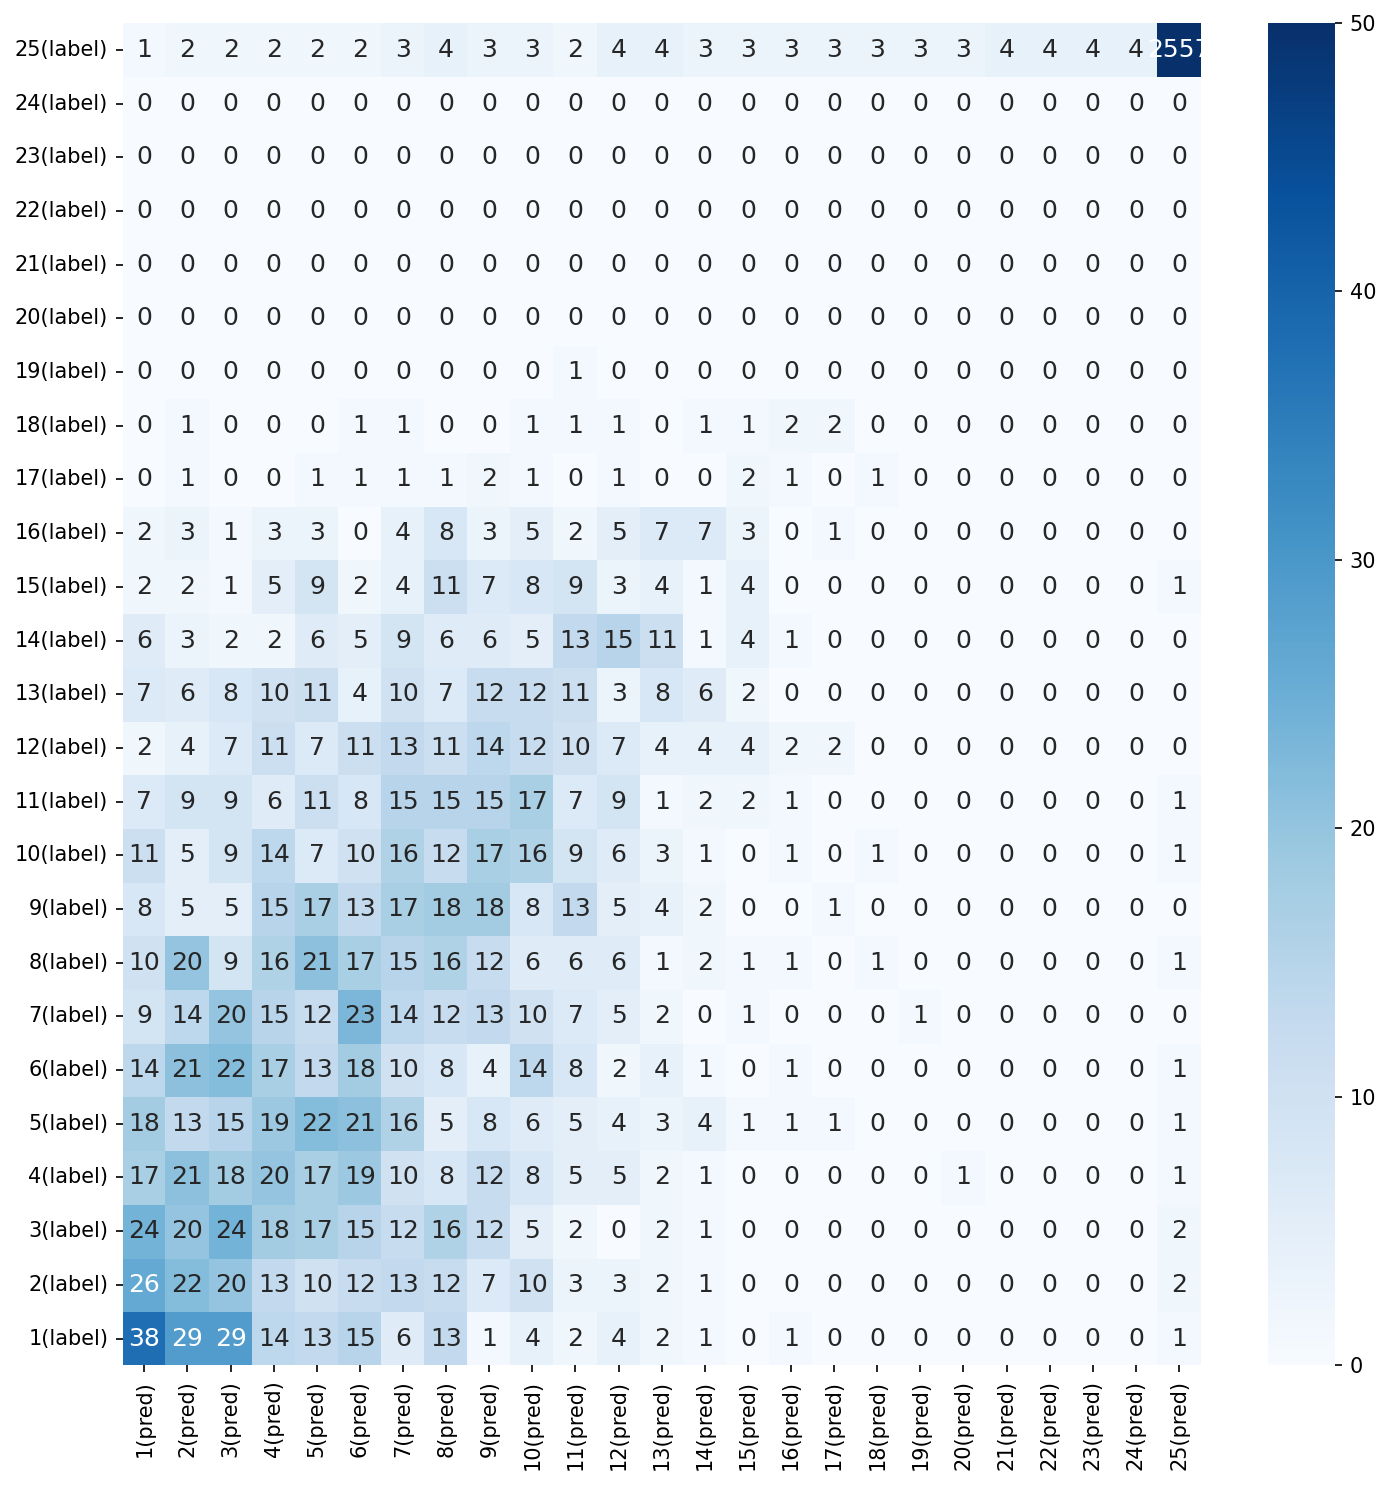

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

labels = [i for i in range(1,26)]

# create confusion matrix
conf_mx = confusion_matrix(y_ans, pred, labels=labels)
conf_df = pd.DataFrame(data=conf_mx, index=[str(x) + "(label)" for x in labels], columns=[str(x) + "(pred)" for x in labels])

# visualization
plt.figure(figsize=(10, 10), dpi=150)
sns.heatmap(conf_df, cmap='Blues', annot=True, fmt='d', annot_kws={"size": 12}, vmax=50).invert_yaxis()
plt.tight_layout()
plt.savefig("heat_map.png")
 
print(classification_report(y_ans, pred, labels=labels, digits=3))